# SVM (Support Vector Machine)

SVM은 딥러닝 이전 뛰어난 성능으로 많은 주목을 받았던 모델로써 분류, 회귀 모두에서 활용가능하다. 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지에 대해 비확률적 이진 선형 분류 모델을 만든다.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

%matplotlib inline

----

**TIP)**    
*Margin*    

참고자료: https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/

아래 그림에서 $B_{1}$은 $B_{2}$보다 두 범주를 여유롭게 가르고 있으며, 이때 $b_{11}$을 plus-plane, $b_{12}$를 minus-plane이라고 하며 $b_{11}$과 $b_{12}$ 사이의 거리를 margin이라고 한다. SVM은 이 margin을 최대화 하는 분류 경계면을 찾는 기법이다.

<img src='./image/margin.png'>

찾아야 하는 경계면을 $w^{T}x + b = 0$이라고 할때 $w$는 경계면과 수직인 법선벡터가 되며 plus-plane은 $w^{T}x + b = 1$, minus-plane은 $w^{T}x + b = -1$이 된다.    
    
plus-plane 위에 있는 벡터$x^{+}$는 $x^{-}$와 $x^{+} = x^{-} + \lambda w$과 같은 관계를 가진다. 위 관계를 통해 $\lambda$를 구하면 다음과 같다.    
> $w^{T}x^{+} + b = 1$    
$w^{T}(x^{-} + \lambda w) + b = 1$    
$W^{T}x^{-} + b + \lambda w^{T}w = 1$    
$-1 + \lambda w^{T}w = 1$    
$\lambda = \frac{2}{w^{T}w}$    
    
$\lambda$를 구했으므로 margin을 $w$로 정리할 수가 있다.    
>$Margin = distance(x^{+}, x^{-})$    
&nbsp;    $= \parallel x^{+} - x^{-}  \parallel_{2}$    
&nbsp;    $= \parallel x^{-} + \lambda w - x^{-}  \parallel_{2}$   
&nbsp;    $= \parallel \lambda w  \parallel_{2}$   
&nbsp;    $= \lambda \sqrt{w^{T}w}$   
&nbsp;    $= \frac{2}{w^{T}w} \sqrt{w^{T}w}$   
&nbsp;    $= \frac{2}{\sqrt{w^{T}w}}$    
&nbsp;    $= \frac{2}{\parallel w \parallel_{2}}$    

SVM의 목적은 margin을 최대화 하는 경계면을 찾는 것이므로 $max (\frac{2}{\parallel w \parallel_{2}})$의 문제를 푸는것으로 귀결된다. 계산의 편의를 위해 margin의 절반을 제곱한 것에 역수를 취한 뒤 그 절반을 최소화 하는 문제로 바꾼 뒤에 계산한다. (문제의 본질은 동일하다) 이때, plus-plane보다 위에 있는 관측치들은 $y=1$이고 $w^{T}x + b$가 1보다 크다. 반대로 minus-plane보다 아래에 있는 관측치들은 $y=-1$이고 $w^{T}x + b$가 -1보다 작다. 이 두 조건으로 인해 제약조건은 다음과 같다.      
> $max (\frac{2}{\parallel w \parallel_{2}}$) -> $min (\frac{\parallel w \parallel_{2}^{2}}{2}$)    

> 제약식:  $y_{i}(w^{T}x_{i}+b) \geq 1$    

라그랑지안 승수법(Lagrange multiple method)은 제약식에 형식적인 라그랑지안 승수를 곱항 항을 최적화 하려는 목적식에 더하여, 제약된 문제를 제약이 없는 문제로 바꾸는 기법이다. 이 라그랑지안 승수법을 이용하여 정의된 목적식과 제약식을 라그랑지안 문제로 식을 다시 쓰면 다음과 같다. 이때, 원래 제약식의 범위가 0 이상이므로 $L_{p}$의 제약은 아래와 같다.      
> $min(L_{p}(w, b, \alpha_{i})) = \frac{2}{\parallel w \parallel_{2}} - \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$    

> 제약식: $\alpha_{i} \geq 0, (i=1, 2, ..., n$)

$L_{p}$를 미지수로 각각 편미분한 식이 0이 되는 지점에서 최소값을 가지므로 아래의 문제를 풀면된다.   
> $\frac{\partial L(w, b, \alpha_{i})}{\partial w} = 0$  ->  $w = \sum^{n}_{i=1}\alpha_{i} y_{i} x_{i}$ 
    
> $\frac{\partial L(w, b, \alpha_{i})}{\partial b} = 0$  ->  $\sum^{n}_{i=1}\alpha_{i} y_{i} = 0$

첫번째 항인 $\frac{2}{\parallel w \parallel_{2}}$을 정리하면 다음과 같다.   
> $\frac{2}{\parallel w \parallel_{2}}$ = $\frac{1}{2}w^{T}w$   
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}w^{T}\sum^{n}_{j=1}\alpha_{j}y_{j}x_{j}$    
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}\sum^{n}_{j=1}\alpha_{j}y_{j}(w^{T}x_{j})$    
&nbsp;&nbsp;&nbsp;  = $\frac{1}{2}\sum^{n}_{j=1}\alpha_{j}y_{j}(\sum^{n}_{i=1}\alpha_{i}y_{i}x^{T}_{i}x_{j})$   
&nbsp;&nbsp;&nbsp;  = $\frac{1}
{2}\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j}$   

두번째 항인 $- \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$을 정리하면 다음과 같다.   
> $- \sum^{n}_{i=1}\alpha_{i}(y_{i}(w^{T}x_{i}+b) - 1)$ = $-\sum^{n}_{i=1}\alpha_{i}y_{i}(w^{T}x_{i} + b) + \sum^{n}_{i=1}\alpha_{i}$    
&nbsp;&nbsp;             = $-\sum^{n}_{i=1}\alpha_{i}y_{i}w^{T}x_{i} - b\sum^{n}_{i=1}\alpha_{i}y_{i} + \sum^{n}_{i=1}\alpha_{i}$    
&nbsp;&nbsp;             = $-\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j} + \sum^{n}_{i=1}\alpha_{i}$

첫번째 항과 두번쨰 항의 정리 결과를 토대로 $L_{p}$를 정리하면 되는데, 식을 변형 하는 과정에서 $\alpha$의 최고차항의 계수가 음수이므로 최소값을 찾는 문제가 최대값을 찾는 문제로 바뀌었고 변형된 $L_{D}$는 다음과 같다. 이떄, $L_{D}$의 제약식은 아래와 같다.    
> $max(L_{D}(\alpha_{i})) = \sum^{n}_{i=1}\alpha_{i} - \frac{1}{2}\sum^{n}_{i=1}\sum^{n}_{j=1}\alpha_{i}\alpha_{j}y_{i}y_{j}x^{T}_{i}x_{j}$    

> 제약식: $\sum^{n}_{i=1}\alpha_{i}y_{i} = 0, (\alpha_{i} \geq 0,  i = 1, 2, ..., n$)

찾고자 하는 최대된 분류경계면은 $w^{T}x + b$이므로 $w$와 $b$를 알면 SVM의 해를 구할 수 있다. $w = \sum^{n}_{i=1}\alpha_{i} y_{i} x_{i}$이고 $x_{i}$와 $y_{i}$는 우리가 가지고 있는 학습 데이터이므로 $\alpha$의 값들만 알면 $w$를 찾을 수 있다. 그런데 여기서 $\alpha_{i}$가 0인 관측치들은 분류경계면 형성에 아무런 영향을 끼치지 못한다. 다시 말해, $i$번째 관측치에 대응하는 라그랑지안 승수 $\alpha_{i}$가 0보다 커야 margin결정에 유의미 하다는 이야기이다.    
아울러 KKT(Karush-Kuhn-Tucker) 조건에서 함수가 최적값을 갖는다면, $\alpha_{i}$ 또는 $y_{i}(w^{T}x_{i} + b) - 1$ 두 개 가운데 하나는 반드시 0이므로 $\alpha_{i}$가 0이 아니라면 $y_{i}(w^{T}x_{i} + b) - 1$는 반드시 0이 되어야 한다. 따라서 $x_{i}$는 plus-plane, minus-plane 위에 있는 벡터가 된다.    

<img src='./image/support_vectors.png' width=400 height=400>

이렇게 margin의 결정에 영향을 끼치는 관측치들을 support vectors라고 한다.    
한편, $b$는 이미 구한 $w$와 학습데이터 $y_{i}(w^{T}x_{i} + b - 1) = 0$ 식을 활용하여 바로 구할 수가 있다. 새로운 데이터가 들어왔을 때, 해당 관측치를 $y_{i}(w^{T}x_{i} + b - 1)$에 넣어서 0보다 크면 1, 0보다 작으면 -1 범주로 예측하면 된다.

----

문제를 직관적으로 바라보기 위하여 임의의 데이터를 생성하여 SVM을 학습시키다.

## 1. Draw SVM with Sample Data 01 (Linear)

문제를 직관적으로 바라보기 위하여 임의의 데이터를 생성하여 SVM을 학습시키다.

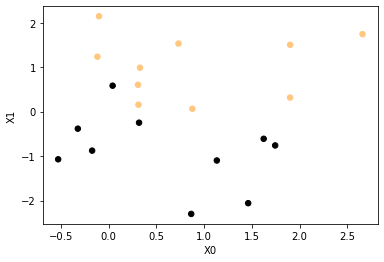

In [2]:
# 임의의 Data Sets 생성
np.random.seed(1)
X = np.random.randn(20, 2)
y = np.repeat([-1, 1], 10)
X[y==1] = X[y==1]  + 1
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap='copper')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [3]:
# SVM 시각화 함수
def plot_classifier(classifier, X, y, h=0.02, buffer=0.5):   # should be 2D feature space 

    # initialize custom marker and color-map : 쵀대 7개 class 까지 지원 
    markers = ('o', '^', 's', 'x', 'v', 'D', '*')
    colors = ('gray', 'green', 'yellow', 'cyan', 'magenta', 'blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
    plt.figure(figsize=(6, 4))
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Plot the decision boundary.
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot sample points
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], alpha=0.9, s=60,
                    marker=markers[idx], label=cls)
        
    plt.legend(loc='upper right', frameon=True, framealpha=0.3, borderaxespad=0.9)
    # additionally, support vectors have a white hole in a marker  
    if isinstance(classifier, (SVC, SVC)):
        sv = classifier.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='w', marker='.', s=40)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
                
        print('Number of Support Vectors (Class, SV) : ', list(zip(np.unique(y), classifier.n_support_)))
        print('indices of vectors: ', classifier.support_)
        g = map(lambda x: [round(x[0], 2), round(x[1], 2)], classifier.support_vectors_)
        print()

Number of Support Vectors (Class, SV) :  [(-1, 3), (1, 3)]
indices of vectors:  [ 0  4  9 13 15 16]



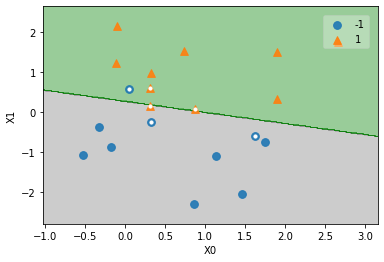

In [6]:
# SVM 모델 학습
# C : Penalty for the error. C higher -> smaller margin, less support vectors
# C의 값이 증가할수록 모델은 complex해진다.
svc = SVC(C= 10, kernel='linear', probability=True)    # C -> 10으로 세팅
svc.fit(X, y)

plot_classifier(svc, X, y)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Number of Support Vectors (Class, SV) :  [(-1, 7), (1, 8)]
indices of vectors:  [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]



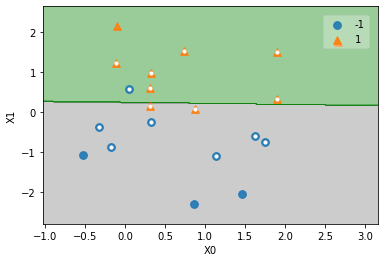

In [7]:
# C : Penalty for the error. C higher -> smaller margin, less support vectors
svc = SVC(C= .1, kernel='linear', probability=True)    # C -> 0.1로 세팅
svc.fit(X, y)

plot_classifier(svc, X, y)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Cost(Panalty)를 10에서 0.1로 낮출 경우 margin이 커지며 더 많은 misclassification을 허용하고, support vector의 수가 늘어난다. 이는 곧 모델이 조금 더 소프트해졌다는 것을 뜻한다.

In [8]:
# C의 변화에 따라 변경되는 모델의 정확도
# 이 경우에는 Data Set이 임의로 생성된 데이터이며 사이즈가 작고 차원이 낮아 신뢰성은 없다.
range_c = [100, 50, 10, 5, 1, 0.5, 0.01, 0.005, 0.001, 0.0005, 0.0001]
scores = []
for c in range_c:
    svc = SVC(C=c, kernel='linear', probability=False)
    score = cross_val_score(svc, X, y, cv=4, scoring='accuracy')
    scores.append(np.mean(score))
for c, s in zip(range_c, scores):
    print('c: %5f \t %.2f' %(c, s))

c: 100.000000 	 0.90
c: 50.000000 	 0.85
c: 10.000000 	 0.90
c: 5.000000 	 0.90
c: 1.000000 	 0.85
c: 0.500000 	 0.80
c: 0.010000 	 0.40
c: 0.005000 	 0.40
c: 0.001000 	 0.40
c: 0.000500 	 0.40
c: 0.000100 	 0.40


## 2. Draw SVM with Sample Data 02 (RBF)

RBF(Radial Basis Function) 커널은 가우시안(Gaussian Kernel)이라고도 불리며, 무한차원으로의 projection이 될 수 있다.

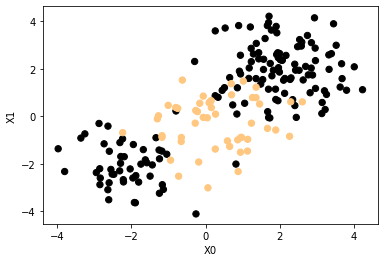

In [9]:
# 임의의 Data Sets 생성
np.random.seed(37)
X = np.random.randn(200, 2)
X[:100, :] = X[:100, :] + 2
X[100:150, :] = X[100:150, :] - 2
y = np.repeat([0, 1], [150, 50])

plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap='copper')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Number of Support Vectors (Class, SV) :  [(0, 38), (1, 18)]
indices of vectors:  [ 0  2  4  5  6  7 10 13 17 18 20 22 26 29 31 32 34 35 36 39 41 42 43 45
 51 55 59 60 64 66 67 73 74 82 87 89 91 94  8  9 11 12 16 23 27 44 54 61
 68 71 72 76 79 84 93 96]



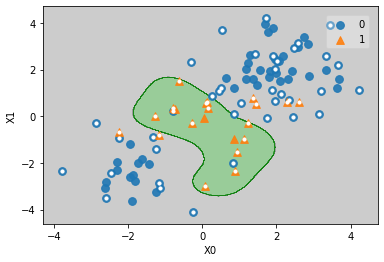

In [10]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, random_state=37)

# RBF 커널의 SVM 학습
# gamma: 커널의 흩어짐을 세팅하며, 가우시안 분포에서 분산에 해당되는 부분이다. 커질수록 complex한 모델이 된다.
rbf_svc = SVC(kernel='rbf', gamma=1, C=1, random_state=123)
rbf_svc.fit(X_train, y_train)

plot_classifier(rbf_svc, X_train, y_train)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

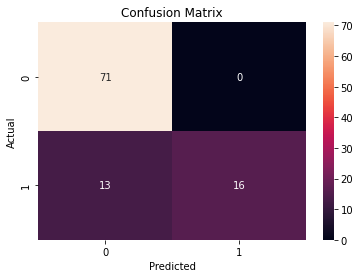


[Confusion Report]

               precision    recall  f1-score   support

           0       0.85      1.00      0.92        71
           1       1.00      0.55      0.71        29

    accuracy                           0.87       100
   macro avg       0.92      0.78      0.81       100
weighted avg       0.89      0.87      0.86       100



In [11]:
# Confusion matrix 확인

def get_confusion_mt(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    confusion_mt = pd.crosstab(_y_test, y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
    return confusion_mt

def get_confusion_report(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    return classification_report(_y_test, y_pred)

# confusion matrix 산출 
confusion_mt = get_confusion_mt(rbf_svc, X_test, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(rbf_svc, X_test, y_test))

In [12]:
# 최적의 C, gamma값 탐색
parm = [{'gamma': [0.1, 0.5, 1, 2, 3],
         'C': [0.01, 0.1, 1, 10, 100]}]

# GridSearchCV(): 모델의 하이퍼파라미터를 순차적으로 입력해 학습 및 측정을 하여 가장 좋은 파라미터를 알려준다.
svm_grid = GridSearchCV(SVC(kernel='rbf'), param_grid=parm, cv=10, scoring='accuracy')
svm_grid.fit(X_train, y_train)
print('best estimator: ', svm_grid.best_estimator_)
print('best score: ', round(svm_grid.best_score_, 2))

best estimator:  SVC(C=1, gamma=0.1)
best score:  0.86


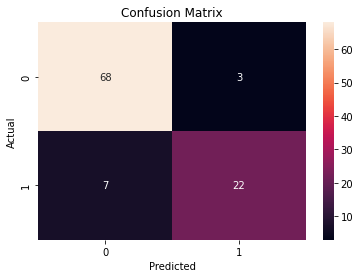


[Confusion Report]

               precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.88      0.76      0.81        29

    accuracy                           0.90       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.90      0.90      0.90       100



In [13]:
# 최적의 파라미터로 학습하여 결과 확인

# confusion matrix 산출 
confusion_mt = get_confusion_mt(svm_grid, X_test, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(svm_grid, X_test, y_test))

## 3. SVM with Toy Data

In [14]:
# Load Data Sets
heart_data = pd.read_csv('./data/Heart.csv', index_col=0)
heart_data.dropna(inplace=True)
heart_data.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [15]:
# Data 정보확인
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [16]:
# 데이터 분할
X = heart_data[heart_data.columns.difference(['AHD'])]
y = heart_data['AHD']

# 더미화
X = pd.get_dummies(X)
y = y.apply(lambda x: 1 if x=='Yes' else 0)

print(X.shape, y.shape)

(297, 18) (297,)


In [ ]:
# Randomized Search CV로 최적 모델 탐색
# Grid Search CV는 연산 기간이 대폭 늘어나므로, 탐색공간의 일부 부분집합만 무작위 탐색하는 Randomized Search CV를 사용

# 모델 생성 및 학습
svc = SVC()
parm = {'C': [0.01, 0.1, 1, 10, 100], 
        'kernel': ['linear', 'rbf', 'poly'],     # 선형, 가우시안, 다항
        'gamma': [0.1, 0.5, 1, 5, 10]
       }
# n_iter: 파라미터 검색 횟수, n_jobs: 사용할 CPU 코어 수 (-1: all)
svm_randCV_acc = RandomizedSearchCV(svc, param_distributions=parm, cv=7, scoring='accuracy', n_iter=20, n_jobs=-1)
svm_randCV_acc.fit(X, y)
svm_randCV_auc = RandomizedSearchCV(svc, param_distributions=parm, cv=7, scoring='roc_auc', n_iter=20, n_jobs=-1)
svm_randCV_auc.fit(X, y)

print('Best Parm (ACC): ', svm_randCV_acc.best_estimator_)
print('Best Score (ACC): ', svm_randCV_acc.best_score_)
print('Best Parm (AUC): ', svm_randCV_auc.best_estimator_)
print('Best Score (AUC): ', svm_randCV_auc.best_score_)

----

**TIP)**    
*Kernel Trick*


<img src='./image/convert_pot.png' width=400>

0의 정답셋을 가지는 $a_{1}(-1, 1)$, $a_{2}(1, -1)$ 두 변수와 1의 정답셋을 가지는 $b_{1}(1, -1)$, $b_{2}(-1, 1)$ 두 가지를 분류하는 선형적 초평면은 존재하지 않지만 그림과 같이 좌표를 변경시켜주는 kernel $K$가 존재한다면 변경된 좌표에 대해서는 두 가지를 분할하는 선형적 초평면이 존재하게 된다.

이러한 관점에서 m차원의 좌표를 n차원으로 매핑시켜주는 kernel이 존재한다면 아래와 같이 보다 높은 차원으로 데이터를 변경해줌으로써 기존에는 복잡하고 갖기 어려웠던 초평면을 쉽게 생성해줄 수 있다.

<img src='./image/svm_kernel.png' width=400>

----